In [66]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import scipy.io
import time
drive_path = '/home/iris/localexp/fhlexp/brain_observatory/'
# savingfile='/Users/Jensun/Dropbox/SWDB-2016/project/L23_spontaneous'
manifest_path = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

# Experiment containers has as a unique ID, 3 experiment sessions targeting the same set of cells.
expt_cont_list = boc.get_experiment_containers()
# Experiment session has as a unique sessions ID
expt_session_list =boc.get_ophys_experiments()
# good=np.load('good_dfof3_cell_ids.npy')

In [82]:
# compare spontaneous activity
stimuli = 'spontaneous'
L23_VISp=boc.get_ophys_experiments(targeted_structures=['VISp'], imaging_depths=[175], cre_lines=['Cux2-CreERT2'],stimuli=[stimuli])
L4_Cux2_VISp=boc.get_ophys_experiments(targeted_structures=['VISp'], imaging_depths=[275], cre_lines=['Cux2-CreERT2'],stimuli=[stimuli])
L4_Rorb_VISp=boc.get_ophys_experiments(targeted_structures=['VISp'],  cre_lines=['Rorb-IRES2-Cre'],stimuli=[stimuli])
L4_Scnn1a_VISp=boc.get_ophys_experiments(targeted_structures=['VISp'],  cre_lines=['Scnn1a-Tg3-Cre'],stimuli=[stimuli])
L4_VISp=L4_Cux2_VISp+L4_Rorb_VISp+L4_Scnn1a_VISp

In [413]:
layer4 = []
for exp in L4_VISp:
    data = boc.get_ophys_experiment_data(ophys_experiment_id = exp['id'])
    all_t, all_dff = data.get_dff_traces()
    idx = 0
    for start, end in data.get_spontaneous_activity_stimulus_table().get_values():
        if idx == 0:
            t = all_t[start:end]
            dff = all_dff[:, start:end]
            idx += 1
        else:
            t = np.r_[t, all_t[start:end]]
            dff = np.c_[dff, all_dff[:, start:end]]
    layer4.append( [t, dff] )

In [414]:
layer23 = []
for exp in L23_VISp:
    data = boc.get_ophys_experiment_data(ophys_experiment_id = exp['id'])
    all_t, all_dff = data.get_dff_traces()
    idx = 0
    for start, end in data.get_spontaneous_activity_stimulus_table().get_values():
        if idx == 0:
            t = all_t[start:end]
            dff = all_dff[:, start:end]
            idx += 1
        else:
            t = np.r_[t, all_t[start:end]]
            dff = np.c_[dff, all_dff[:, start:end]]
    layer23.append( [t, dff] )

In [415]:
# plot distribution of mean spontaneuous dff
l4_mean = []
for sp in layer4:
    l4_mean = np.r_[l4_mean, np.mean(sp[1], 1)]

l23_mean = []
for sp in layer23:
    l23_mean = np.r_[l23_mean, np.mean(sp[1], 1)]

rank sum test p value is 5.57777887848e-14


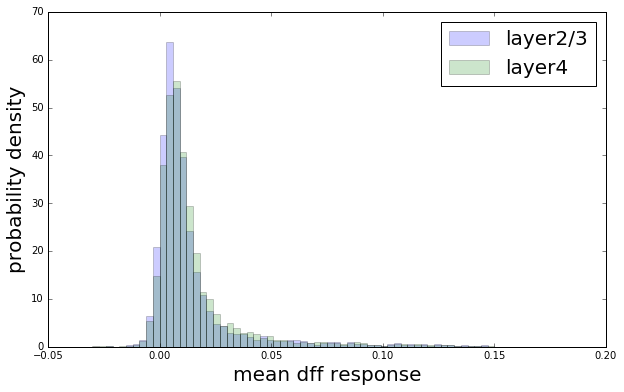

In [445]:
import scipy.stats as stats
plt.figure(figsize = (10,6))
res1 = plt.hist(l23_mean, bins = 60, range=[-0.03, 0.15],  alpha=0.2, log = False, normed = True, label='layer2/3')
res2 = plt.hist(l4_mean, bins = 60, range=[-0.03, 0.15],  alpha=0.2, log = False, normed = True, label='layer4')
plt.legend(loc='upper right', fontsize=20)
plt.ylabel('probability density', fontsize=20)
plt.xlabel('mean dff response', fontsize=20)
print 'rank sum test p value is ' + str(stats.mannwhitneyu(l23_mean, l4_mean)[1])
plt.show()